In [981]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

from sklearn.svm import LinearSVC

plt.rcParams['figure.figsize'] = (10,8)

In [982]:
%ls

 Volume in drive C is Windows 10
 Volume Serial Number is D890-1A1D

 Directory of C:\Users\user\Documents\Python Scripts\Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,2nd_Edition\Chapter 3 MNIST

09/21/2020  06:06 PM    <DIR>          .
09/21/2020  06:06 PM    <DIR>          ..
09/21/2020  10:32 AM    <DIR>          .ipynb_checkpoints
09/13/2020  01:33 PM    <DIR>          .vscode
09/21/2020  06:06 PM           350,623 chapter 3 remaining questions.ipynb
08/30/2018  11:54 PM            28,210 titanic_test.csv
08/30/2018  11:54 PM            60,302 titanic_train.csv
               3 File(s)        439,135 bytes
               4 Dir(s)  39,420,260,352 bytes free


In [983]:
load_train = pd.read_csv('titanic_train.csv')
load_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [984]:
load_test = pd.read_csv('titanic_test.csv')
load_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [985]:
completeData = pd.concat([load_train, load_test],axis=0)
completeData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [986]:
completeData['Survived'].isnull().sum()

418

## Move null rows to test set

In [987]:
completeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [988]:
completeData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [989]:
completeData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [990]:
completeData = completeData.set_index(['PassengerId'])
completeData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [991]:
test = completeData[completeData['Survived'].isna()]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  0 non-null      float64
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


In [992]:
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [993]:
test = test.drop(['Survived'], axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [994]:
train = completeData[~completeData['Survived'].isna()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


In [995]:
len(train) - int(len(train)*(0.10))

802

In [996]:
thres = 801
train, test = train.iloc[:thres], train.iloc[thres:]

## Feature analysis and engineering

In [997]:
trainBackup = train.copy()
train = train.reset_index().drop(['PassengerId'], axis=1)

In [998]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
796,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
797,1.0,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
798,0.0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C
799,0.0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S


## EDA

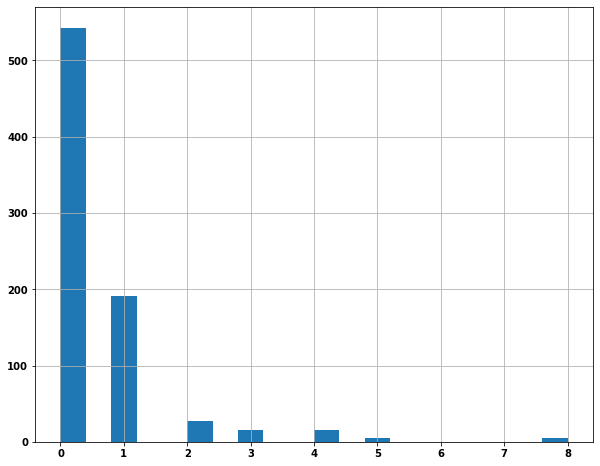

In [999]:
train['SibSp'].hist(bins=20)

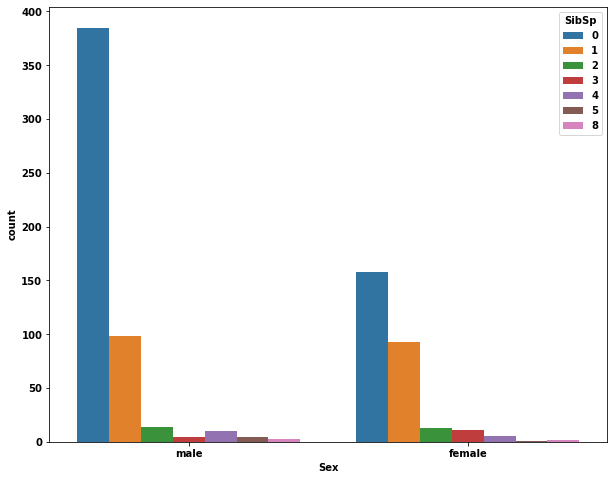

In [1000]:
# train.plot(kind='scatter', x='Sex', y='SibSp')
# plt.show()

sb.countplot(x='Sex', data=train, hue='SibSp')
plt.show()

In [1001]:
train['SibSp'].isnull().sum() # no null 

0

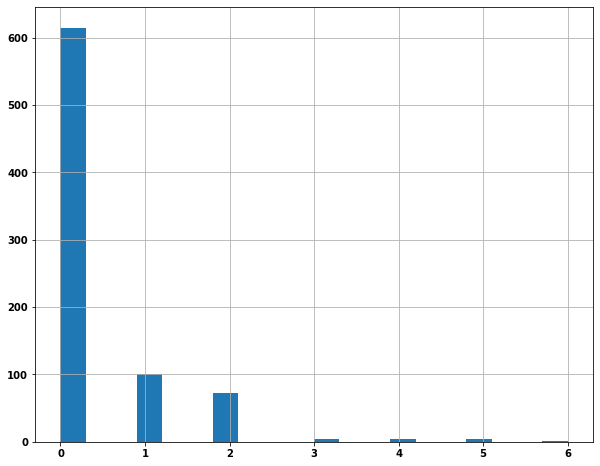

In [1002]:
train['Parch'].hist(bins=20)
plt.show()

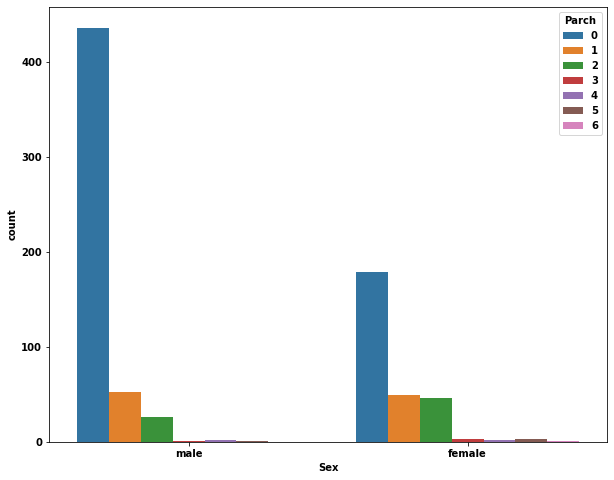

In [1003]:
sb.countplot(x='Sex', data=train, hue='Parch')
plt.show()

In [1004]:
train['Parch'].isnull().sum() # no null

0

In [1005]:
train['Cabin'].nunique()

136

In [1006]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1007]:
## finding nulls

In [1008]:
train_backup = train.copy()

In [1009]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         163
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       616
Embarked      1
dtype: int64

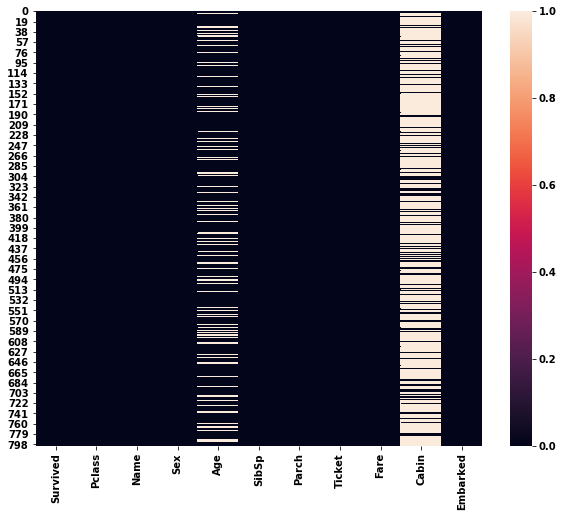

In [1010]:
sb.heatmap(train.isnull())

In [1011]:
train.corr()['Survived']

Survived    1.000000
Pclass     -0.324885
Age        -0.087447
SibSp      -0.025547
Parch       0.077024
Fare        0.250809
Name: Survived, dtype: float64

In [1012]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  801 non-null    float64
 1   Pclass    801 non-null    int64  
 2   Name      801 non-null    object 
 3   Sex       801 non-null    object 
 4   Age       638 non-null    float64
 5   SibSp     801 non-null    int64  
 6   Parch     801 non-null    int64  
 7   Ticket    801 non-null    object 
 8   Fare      801 non-null    float64
 9   Cabin     185 non-null    object 
 10  Embarked  800 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 69.0+ KB


In [1013]:
train[['Pclass','Fare']]

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
796,1,25.9292
797,3,8.6833
798,3,7.2292
799,3,24.1500


In [1014]:
fare_by_pclass = train['Fare']/train['Pclass']
fare_by_pclass

0       2.416667
1      71.283300
2       2.641667
3      53.100000
4       2.683333
         ...    
796    25.929200
797     2.894433
798     2.409733
799     8.050000
800     6.500000
Length: 801, dtype: float64

In [1015]:
train['Fare_by_pclass'] = fare_by_pclass

In [1016]:
train.corr()['Survived']

Survived          1.000000
Pclass           -0.324885
Age              -0.087447
SibSp            -0.025547
Parch             0.077024
Fare              0.250809
Fare_by_pclass    0.258424
Name: Survived, dtype: float64

In [1017]:
train.Embarked.nunique()

3

In [1018]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

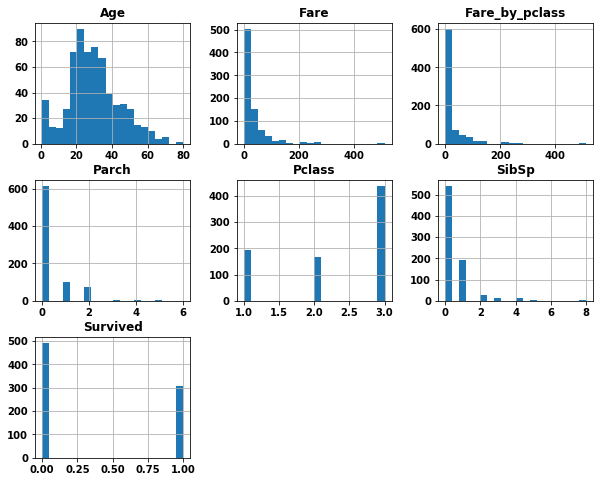

In [1019]:
train.hist(bins=20)
plt.show()

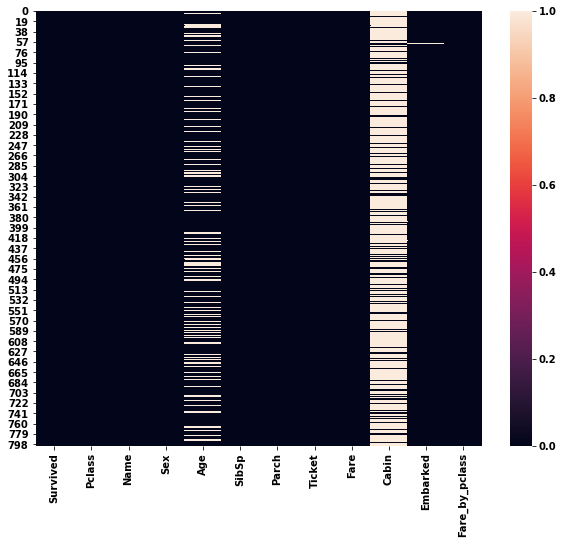

In [1020]:
sb.heatmap(train.isnull())

In [1021]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_pclass
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.416667
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.283300
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.641667
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.100000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.683333
...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,25.929200
797,1.0,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,2.894433
798,0.0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C,2.409733
799,0.0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,8.050000


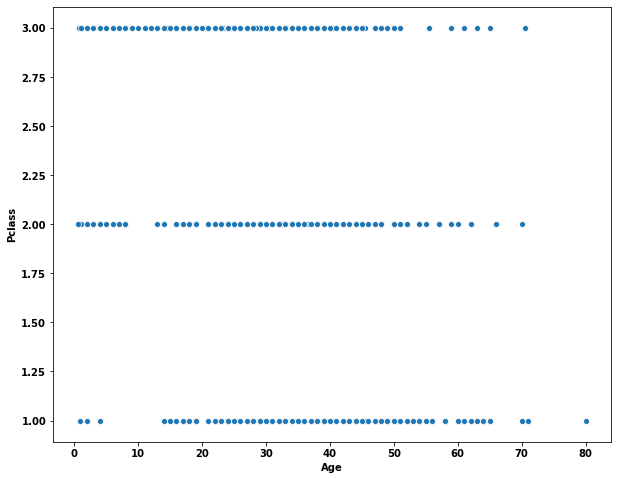

In [1022]:
sb.scatterplot(x='Age', y='Pclass', data=train)
plt.show()

In [1023]:
train['Age'].median()

28.0

In [1024]:
train['Age'].mean()

29.877617554858933

In [1025]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_pclass
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.416667
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.283300
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.641667
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.100000
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.683333
...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,25.929200
797,1.0,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,2.894433
798,0.0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C,2.409733
799,0.0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,8.050000


In [1026]:
train['Age'] = train['Age'].fillna(value= train.Age.median())

In [1027]:
train = train.drop(['Cabin'], axis=1)

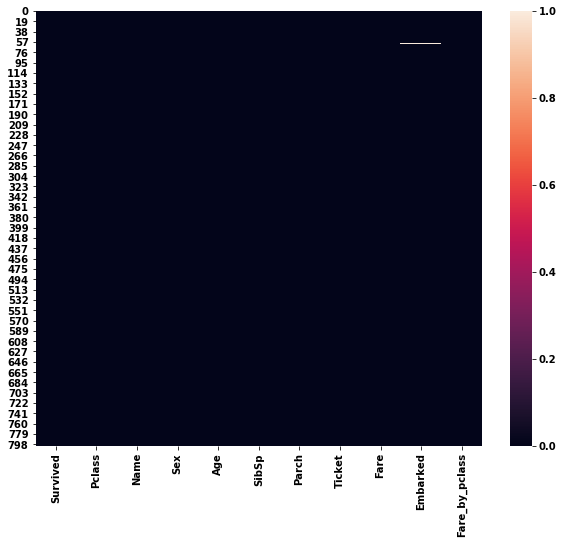

In [1028]:
sb.heatmap(train.isnull())

In [1029]:
train['Embarked'] = train['Embarked'].fillna(method='ffill')

In [1030]:
train.isna().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Fare_by_pclass    0
dtype: int64

In [1031]:
train.dtypes

Survived          float64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Embarked           object
Fare_by_pclass    float64
dtype: object

In [1032]:
train = train.astype({
    'Survived': 'int32',
    'Age': 'int32',
})

In [1033]:
train.dtypes

Survived            int32
Pclass              int64
Name               object
Sex                object
Age                 int32
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Embarked           object
Fare_by_pclass    float64
dtype: object

In [1034]:
onehot = OneHotEncoder()

In [1035]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_by_pclass
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2.416667
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,71.283300
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,2.641667
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,53.100000
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,2.683333


In [1036]:
categories = ['Sex','Embarked']

onehotmat = onehot.fit_transform(train[categories])
onehotmat

<801x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1602 stored elements in Compressed Sparse Row format>

In [1037]:
onehot.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [1038]:
onehotarr = onehotmat.toarray()
onehotarr

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [1039]:
sex1hot = pd.DataFrame(data=onehotarr, columns=['female','male','C', 'Q', 'S'])
sex1hot

,female,male,C,Q,S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
796,1.0,0.0,0.0,0.0,1.0
797,1.0,0.0,0.0,0.0,1.0
798,0.0,1.0,1.0,0.0,0.0
799,1.0,0.0,0.0,0.0,1.0


In [1040]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_by_pclass
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2.416667
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,71.283300
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,2.641667
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,53.100000
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,2.683333
...,...,...,...,...,...,...,...,...,...,...,...
796,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,S,25.929200
797,1,3,"Osman, Mrs. Mara",female,31,0,0,349244,8.6833,S,2.894433
798,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30,0,0,2685,7.2292,C,2.409733
799,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30,1,1,345773,24.1500,S,8.050000


In [1041]:
train1hot = pd.concat([train, sex1hot], axis=1)
train1hot

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_by_pclass,female,male,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2.416667,0.0,1.0,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,71.283300,1.0,0.0,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,2.641667,1.0,0.0,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,53.100000,1.0,0.0,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,2.683333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,S,25.929200,1.0,0.0,0.0,0.0,1.0
797,1,3,"Osman, Mrs. Mara",female,31,0,0,349244,8.6833,S,2.894433,1.0,0.0,0.0,0.0,1.0
798,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30,0,0,2685,7.2292,C,2.409733,0.0,1.0,1.0,0.0,0.0
799,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30,1,1,345773,24.1500,S,8.050000,1.0,0.0,0.0,0.0,1.0


In [1042]:
to_drop = ['Embarked','Sex', 'Name', 'Ticket']
train1hot.drop(to_drop, axis=1, inplace=True)

In [1043]:
train1hot

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_by_pclass,female,male,C,Q,S
0,0,3,22,1,0,7.2500,2.416667,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,71.283300,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,2.641667,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,53.100000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,2.683333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,1,49,0,0,25.9292,25.929200,1.0,0.0,0.0,0.0,1.0
797,1,3,31,0,0,8.6833,2.894433,1.0,0.0,0.0,0.0,1.0
798,0,3,30,0,0,7.2292,2.409733,0.0,1.0,1.0,0.0,0.0
799,0,3,30,1,1,24.1500,8.050000,1.0,0.0,0.0,0.0,1.0


## custom pipeline

1- `train['Age'] = train['Age'].fillna(value= train.Age.median())` 



1- `train['Embarked'] = train['Embarked'].fillna(method='ffill')`

2- `train = train.astype({
    'Survived': 'int32',
    'Age': 'int32',
})`


In [1044]:
## no use

cols_todrop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']

class CustomTranform(BaseEstimator, TransformerMixin):
    def __init__(self, add_feature = True):
        self.add_feature = add_feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Age'] = X['Age'].fillna(value= X['Age'].median())
        X['Embarked'] = X['Embarked'].fillna(method='ffill')
        X = X.astype({
            'Survived': 'int32',
            'Age': 'int32',
        })
        
        
        if self.add_feature:
            fare_by_pclass = X['Fare']/X['Pclass']
            X['fare_by_pclass'] = fare_by_pclass
            
        return X

## Complete Preprocessing (working)

In [1045]:
class Preprocessing_full():
    def __init__(self, add_feature = True, is_survive= True):
        self.add_feature = add_feature
        self.is_survive = is_survive
        
    def preprocess(self, X):       
        # fill Nan
        X['Age'] = X['Age'].fillna(value= X['Age'].median())
        X['Embarked'] = X['Embarked'].fillna(method='ffill')
        
        # Set types
        if self.is_survive:
            X = X.astype({
                'Survived': 'int32',
                'Age': 'int32',
            })
        else:
            X = X.astype({
                'Age': 'int32',
            })
            
        
        # add feature
        if self.add_feature:
            fare_by_pclass = X['Fare']/X['Pclass']
            X['fare_by_pclass'] = fare_by_pclass
        
        # onehot encoding
        from sklearn.preprocessing import OneHotEncoder
        self.categories = ['Sex','Embarked']
        onehot = OneHotEncoder()
        onehotmat = onehot.fit_transform(X[self.categories])
        onehotarr = onehotmat.toarray()
        
        sex1hot = pd.DataFrame(data=onehotarr, columns=['female','male','C', 'Q', 'S'])
        
        train1hot = pd.concat([X, sex1hot], axis=1)
        train1hot
        
        # drop garbage cols
        cols = ['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin']
        train1hot.drop(cols, axis=1, inplace= True)
        
                
            
        return train1hot

In [1046]:
train = train_backup.copy()
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1047]:
train_prep = Preprocessing_full()
train = train_prep.preprocess(train)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_by_pclass,female,male,C,Q,S
0,0,3,22,1,0,7.2500,2.416667,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,71.283300,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,2.641667,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,53.100000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,2.683333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,1,49,0,0,25.9292,25.929200,1.0,0.0,0.0,0.0,1.0
797,1,3,31,0,0,8.6833,2.894433,1.0,0.0,0.0,0.0,1.0
798,0,3,30,0,0,7.2292,2.409733,0.0,1.0,1.0,0.0,0.0
799,0,3,30,1,1,24.1500,8.050000,1.0,0.0,0.0,0.0,1.0


In [1048]:
test_prep = Preprocessing_full(is_survive= False)
test = test_prep.preprocess(test.reset_index().drop(['PassengerId'], axis=1))
test

,Survived,Pclass,Age,SibSp,Parch,Fare,fare_by_pclass,female,male,C,Q,S
0,1.0,2,31,1,1,26.2500,13.125000,1.0,0.0,0.0,0.0,1.0
1,1.0,1,11,1,2,120.0000,120.000000,0.0,1.0,0.0,0.0,1.0
2,1.0,3,0,0,1,8.5167,2.838900,0.0,1.0,1.0,0.0,0.0
3,1.0,3,27,0,0,6.9750,2.325000,0.0,1.0,0.0,0.0,1.0
4,0.0,3,31,0,0,7.7750,2.591667,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,2,27,0,0,13.0000,6.500000,0.0,1.0,0.0,0.0,1.0
86,1.0,1,19,0,0,30.0000,30.000000,1.0,0.0,0.0,0.0,1.0
87,0.0,3,27,1,2,23.4500,7.816667,1.0,0.0,0.0,0.0,1.0
88,1.0,1,26,0,0,30.0000,30.000000,0.0,1.0,1.0,0.0,0.0


In [1049]:
X_train, y_train =  train.drop('Survived', axis=1), train['Survived']
X_test, y_test =  test.drop('Survived', axis=1), test['Survived']

In [1050]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
796    1
797    1
798    0
799    0
800    0
Name: Survived, Length: 801, dtype: int32

In [1051]:
svc = LinearSVC()
svc.fit(X_train,y_train)

C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [1053]:
someval = X_test.iloc[13]
svc.predict([someval])

array([0])

In [1056]:
cross_val_score(svc,X= X_test,y= y_test , cv=5, scoring= 'accuracy')

C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\envs\pfs\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

array([0.72222222, 0.83333333, 0.83333333, 0.66666667, 0.38888889])